In [1]:
import pandas as pd

file_path = 'point_cloud_1.txt'

try:
    # pd.read_csv cũng rất mạnh mẽ, header=None vì file không có dòng tiêu đề.
    # names=['x', 'y', 'z'] để đặt tên cho các cột.
    # sep=',' là ký tự phân tách.
    df = pd.read_csv(file_path, header=None, names=['x', 'y', 'z'], sep=',')

    print("Đọc file thành công vào DataFrame!")
    print(f"Tổng số điểm: {len(df)}")
    print("\n5 điểm đầu tiên:")
    print(df.head())

    # Để thực hiện tính toán, bạn nên chuyển DataFrame thành mảng NumPy
    point_cloud = df.values
    
    print("\nChuyển đổi thành mảng NumPy:")
    print(point_cloud[:5])


except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file tại '{file_path}'")
except Exception as e:
    print(f"Đã xảy ra lỗi khi đọc file: {e}")

Đọc file thành công vào DataFrame!
Tổng số điểm: 24922949

5 điểm đầu tiên:
         x        y       z
0 -40.4630  22.8951 -2.1514
1 -40.3050  23.0678 -2.1724
2 -40.3183  23.0453 -2.1444
3 -40.3126  23.0710 -2.1444
4 -40.2875  23.0910 -2.1434

Chuyển đổi thành mảng NumPy:
[[-40.463   22.8951  -2.1514]
 [-40.305   23.0678  -2.1724]
 [-40.3183  23.0453  -2.1444]
 [-40.3126  23.071   -2.1444]
 [-40.2875  23.091   -2.1434]]


In [13]:
df['z',1]

KeyError: ('z', 1)

In [15]:
len(df['z'])

24922949

In [21]:
df['z']

0           -2.1514
1           -2.1724
2           -2.1444
3           -2.1444
4           -2.1434
             ...   
24922944    13.8316
24922945    13.8316
24922946    13.8316
24922947    13.8316
24922948    13.8336
Name: z, Length: 24922949, dtype: float64

In [23]:
z_next 

0           -2.1724
1           -2.1444
2           -2.1444
3           -2.1434
4            1.3296
             ...   
24922944    13.8316
24922945    13.8316
24922946    13.8316
24922947    13.8336
24922948        NaN
Name: z, Length: 24922949, dtype: float64

In [27]:
df_sorted = df.sort_values(by='z')

# reset_index(drop=True) là một bước tùy chọn nhưng rất nên làm.
# Nó tạo lại index từ 0, 1, 2,... cho DataFrame mới, tránh nhầm lẫn.
df_sorted = df_sorted.reset_index(drop=True)

print("\n--- DataFrame sau khi đã sắp xếp theo Z ---")
print(df_sorted)



--- DataFrame sau khi đã sắp xếp theo Z ---
                x        y        z
0         -0.4364   0.0204  -2.2314
1        -40.3050  23.0678  -2.1724
2        -40.4630  22.8951  -2.1514
3        -40.3126  23.0710  -2.1444
4        -40.3183  23.0453  -2.1444
...           ...      ...      ...
24922944   5.0236   9.5987  15.4336
24922945   4.7522   9.9014  15.4356
24922946   4.7365   9.9120  15.4376
24922947   5.0630   9.5364  15.4446
24922948   4.7421   9.9078  15.4456

[24922949 rows x 3 columns]


In [37]:
df_sorted['z']

0           -2.2314
1           -2.1724
2           -2.1514
3           -2.1444
4           -2.1444
             ...   
24922944    15.4336
24922945    15.4356
24922946    15.4376
24922947    15.4446
24922948    15.4456
Name: z, Length: 24922949, dtype: float64

In [35]:
-2.1724 + 2.2314

0.05899999999999972

In [33]:
z_next

0           -2.1724
1           -2.1514
2           -2.1444
3           -2.1444
4           -2.1434
             ...   
24922944    15.4356
24922945    15.4376
24922946    15.4446
24922947    15.4456
24922948        NaN
Name: z, Length: 24922949, dtype: float64

In [39]:
z_diff = []
z_next = df_sorted['z'].shift(-1)
z_diff = z_next - df_sorted['z']

<Axes: >

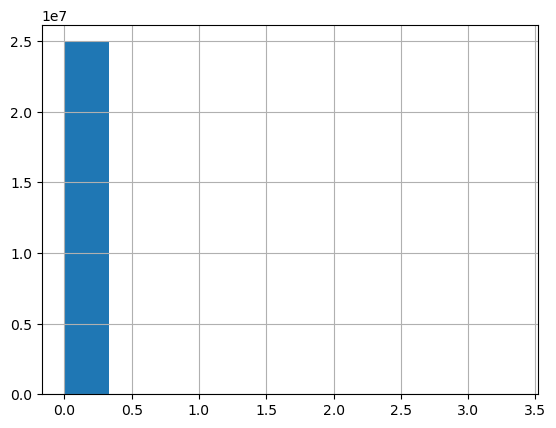

In [43]:
z_diff.hist()

In [51]:
import numpy as np

In [55]:
point = df_sorted
point['x']

0           -0.4364
1          -40.3050
2          -40.4630
3          -40.3126
4          -40.3183
             ...   
24922944     5.0236
24922945     4.7522
24922946     4.7365
24922947     5.0630
24922948     4.7421
Name: x, Length: 24922949, dtype: float64

In [95]:
mean_x = np.mean(point['x'])
mean_y = np.mean(point['y'])


0           -2.2314
1           -2.1724
2           -2.1514
3           -2.1444
4           -2.1444
             ...   
24922944    15.4336
24922945    15.4356
24922946    15.4376
24922947    15.4446
24922948    15.4456
Name: z, Length: 24922949, dtype: float64

In [193]:
import pandas as pd
import numpy as np


# 1. Xác định các tham số
target_z = 7.26    # Cao độ Z bạn muốn lấy
slice_thickness = 5 # Độ dày lớp cắt (ví dụ: 1mm). Bạn có thể điều chỉnh.

# 2. Tính toán biên trên và biên dưới của lớp cắt
lower_bound = target_z - (slice_thickness / 2)
upper_bound = target_z + (slice_thickness / 2)

print(f"\nĐang lọc các điểm có Z trong khoảng [{lower_bound:.5f}, {upper_bound:.5f}]")

# 3. Thực hiện lọc bằng boolean indexing
# Đây là cách làm hiệu quả nhất trong Pandas
slice_df = df_sorted[(df_sorted['z'] >= lower_bound) & (df_sorted['z'] <= upper_bound)]

print("\n--- Các điểm thỏa mãn điều kiện ---")
print(slice_df)

# 4. Lấy riêng tọa độ X, Y nếu cần
if not slice_df.empty:
    # Lấy X, Y dưới dạng DataFrame
    xy_coordinates_df = slice_df[['x', 'y']]
    print("\n--- Tọa độ X, Y (dạng DataFrame) ---")
    print(xy_coordinates_df)
    
    # Lấy X, Y dưới dạng mảng NumPy (thường dùng cho tính toán)
    xy_coordinates_np = slice_df[['x', 'y']].values
    print("\n--- Tọa độ X, Y (dạng mảng NumPy) ---")
    print(xy_coordinates_np)
else:
    print("\nKhông tìm thấy điểm nào trong khoảng Z đã cho.")


Đang lọc các điểm có Z trong khoảng [4.76000, 9.76000]

--- Các điểm thỏa mãn điều kiện ---
               x        y       z
8015723  -5.3984   2.8766  4.7606
8015724   6.1148   8.4301  4.7606
8015725  -5.0810   2.4440  4.7606
8015726   6.3557   5.4801  4.7606
8015727  -6.0821   8.6685  4.7606
...          ...      ...     ...
15100587 -6.4731   6.3486  9.7596
15100588  3.9621  11.5118  9.7596
15100589  3.6229   1.1129  9.7596
15100590  6.3765   5.5972  9.7596
15100591  3.6269   1.1148  9.7596

[7084869 rows x 3 columns]

--- Tọa độ X, Y (dạng DataFrame) ---
               x        y
8015723  -5.3984   2.8766
8015724   6.1148   8.4301
8015725  -5.0810   2.4440
8015726   6.3557   5.4801
8015727  -6.0821   8.6685
...          ...      ...
15100587 -6.4731   6.3486
15100588  3.9621  11.5118
15100589  3.6229   1.1129
15100590  6.3765   5.5972
15100591  3.6269   1.1148

[7084869 rows x 2 columns]

--- Tọa độ X, Y (dạng mảng NumPy) ---
[[-5.3984  2.8766]
 [ 6.1148  8.4301]
 [-5.081   2.444

In [137]:
len(slice_df)

12970

In [153]:
import numpy as np

def circle_fit_by_taubin(points):
    """
    Khớp hình tròn bằng thuật toán Taubin, chuyển đổi từ code C++ của Nikolai Chernov.

    Args:
        points (np.array): Một mảng NumPy có hình dạng (N, 2), 
                           trong đó N là số điểm, các cột là X và Y.

    Returns:
        tuple: (a, b, r, iterations) 
               a, b: Tọa độ tâm hình tròn
               r: Bán kính hình tròn
               iterations: Số lần lặp của phương pháp Newton
    """
    n = points.shape[0]
    if n < 3:
        raise ValueError("Cần ít nhất 3 điểm để khớp hình tròn.")

    # --- 1. Tính toán giá trị trung bình và dịch chuyển dữ liệu ---
    mean_x = np.mean(points[:, 0])
    mean_y = np.mean(points[:, 1])
    
    # Dữ liệu đã được dịch chuyển (centered data)
    xi = points[:, 0] - mean_x
    yi = points[:, 1] - mean_y
    zi = xi**2 + yi**2

    # --- 2. Tính toán các Moment ---
    # np.mean() sẽ thực hiện cả việc cộng và chia cho n
    m_xx = np.mean(xi**2)
    m_yy = np.mean(yi**2)
    m_xy = np.mean(xi * yi)
    m_xz = np.mean(xi * zi)
    m_yz = np.mean(yi * zi)
    m_zz = np.mean(zi**2)

    # --- 3. Tính các hệ số của Phương Trình Đặc Trưng ---
    m_z = m_xx + m_yy
    cov_xy = m_xx * m_yy - m_xy**2
    var_z = m_zz - m_z**2
    
    a3 = 4 * m_z
    a2 = -3 * m_z**2 - m_zz
    a1 = var_z * m_z + 4 * cov_xy * m_z - m_xz**2 - m_yz**2
    a0 = m_xz * (m_xz * m_yy - m_yz * m_xy) + m_yz * (m_yz * m_xx - m_xz * m_xy) - var_z * cov_xy
    
    a22 = a2 + a2
    a33 = a3 + a3 + a3
    
    # --- 4. Tìm Nghiệm của Đa Thức (Newton's Method) ---
    ITER_MAX = 1000
    x = 0.0  # Bắt đầu từ x=0
    y = a0
    
    for i in range(ITER_MAX):
        # Tính đạo hàm P'(x)
        dy = a1 + x * (a22 + a33 * x)
        if dy == 0: # Tránh chia cho 0
            break

        x_new = x - y / dy
        
        # Kiểm tra điều kiện dừng
        if x_new == x or not np.isfinite(x_new):
            break
            
        # Tính giá trị mới của đa thức P(x_new)
        y_new = a0 + x_new * (a1 + x_new * (a2 + x_new * a3))
        
        if abs(y_new) >= abs(y):
            break
            
        x = x_new
        y = y_new
        
    iterations = i + 1

    # --- 5. Tính toán các tham số của hình tròn ---
    det = x**2 - x * m_z + cov_xy
    if det == 0:
        return None, None, None, iterations # Không thể giải
    
    # Tâm trong hệ tọa độ đã dịch chuyển
    x_center = (m_xz * (m_yy - x) - m_yz * m_xy) / (2 * det)
    y_center = (m_yz * (m_xx - x) - m_xz * m_xy) / (2 * det)

    # --- 6. Tổng hợp kết quả ---
    # Dịch chuyển tâm ngược lại về hệ tọa độ gốc
    a = x_center + mean_x
    b = y_center + mean_y
    r = np.sqrt(x_center**2 + y_center**2 + m_z)

    return a, b, r, iterations

# --- Ví dụ sử dụng ---
if __name__ == '__main__':

    x_points = slice_df['x']
    y_points = slice_df['y']
    
    data_points = np.c_[x_points, y_points]

    # Khớp hình tròn bằng thuật toán Taubin
    a_fit, b_fit, r_fit, iters = circle_fit_by_taubin(data_points)

    print("--- Kết quả khớp hình tròn bằng thuật toán Taubin ---")
    print(f"Giá trị khớp: a={a_fit:.4f}, b={b_fit:.4f}, r={r_fit:.4f}")
    print(f"Số lần lặp của Newton's method: {iters}")



--- Kết quả khớp hình tròn bằng thuật toán Taubin ---
Giá trị khớp: a=-4.6957, b=5.5640, r=10.2021
Số lần lặp của Newton's method: 7


In [195]:
x_points = slice_df['x']
y_points = slice_df['y']

In [197]:
len(y_points)

7084869

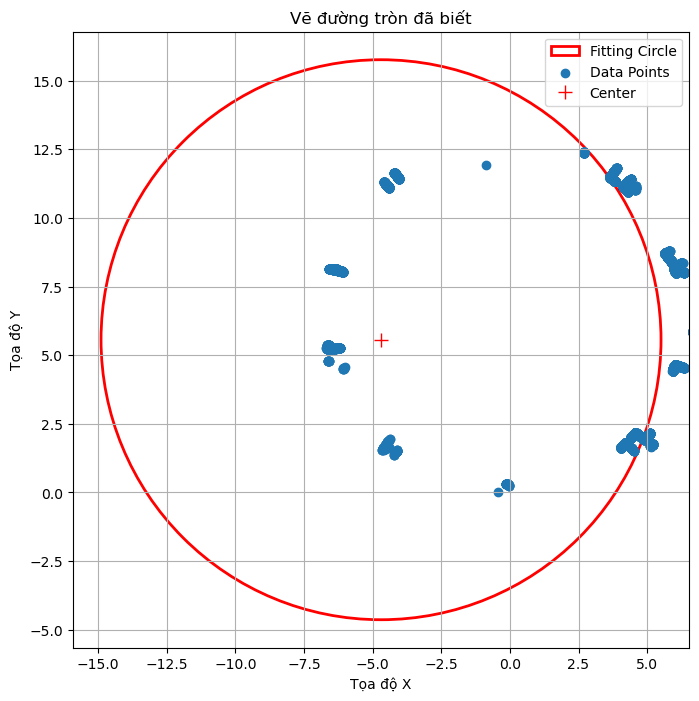

In [155]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(8, 8))

fitting_circle = plt.Circle(
    (a_fit, b_fit),      # Tọa độ tâm
    r_fit,               # Bán kính
    color='red',         # Màu của đường viền
    fill=False,          # Không tô màu bên trong
    linewidth=2,         # Độ dày của đường viền
    label='Fitting Circle' # Nhãn cho chú thích
)

# 3. Thêm (vẽ) đối tượng hình tròn lên Axes
ax.add_artist(fitting_circle)

# 4. (Tùy chọn) Vẽ các điểm dữ liệu gốc để so sánh
if 'x_points' in locals():
    ax.scatter(x_points, y_points, label='Data Points')

# 5. (Tùy chọn) Vẽ tâm của hình tròn để dễ nhìn
ax.plot(a_fit, b_fit, 'r+', markersize=10, label='Center')

# 6. Thiết lập các thuộc tính cho đồ thị
ax.set_title('Vẽ đường tròn đã biết')
ax.set_xlabel('Tọa độ X')
ax.set_ylabel('Tọa độ Y')
ax.legend()  # Hiển thị chú thích
ax.grid(True) # Bật lưới

# 7. Đặt tỉ lệ các trục bằng nhau - RẤT QUAN TRỌNG!
# Điều này đảm bảo hình tròn trông giống hình tròn, không phải hình elip.
ax.set_aspect('equal', adjustable='box')

# 8. Tự động điều chỉnh giới hạn của các trục để hình tròn nằm gọn trong khung nhìn
# Thêm một chút lề (padding) để đẹp hơn
padding = r_fit * 0.1
ax.set_xlim(a_fit - r_fit - padding, a_fit + r_fit + padding)
ax.set_ylim(b_fit - r_fit - padding, b_fit + r_fit + padding)

# 9. Hiển thị đồ thị
plt.show()

In [65]:
mean_x

-0.005604575570089926

--- Bước 1: Tìm điểm khởi đầu bằng Taubin Fit ---
Kết quả Taubin (Initial Guess): a=-0.0211, b=6.4344, r=6.4520

--- Bước 2: Tinh chỉnh bằng Levenberg-Marquardt Fit ---
Kết quả cuối cùng (LM): a=-0.0211, b=6.4344, r=6.4520

--- Bước 3: Đánh giá sai số của kết quả cuối cùng ---
Số điểm dữ liệu: 7084869
Sai số bình phương trung bình gốc (RMSE): 0.004488
Sai số tuyệt đối trung bình (MAE): 0.003591
Sai số lớn nhất (gây ra bởi outlier): 0.0184


C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


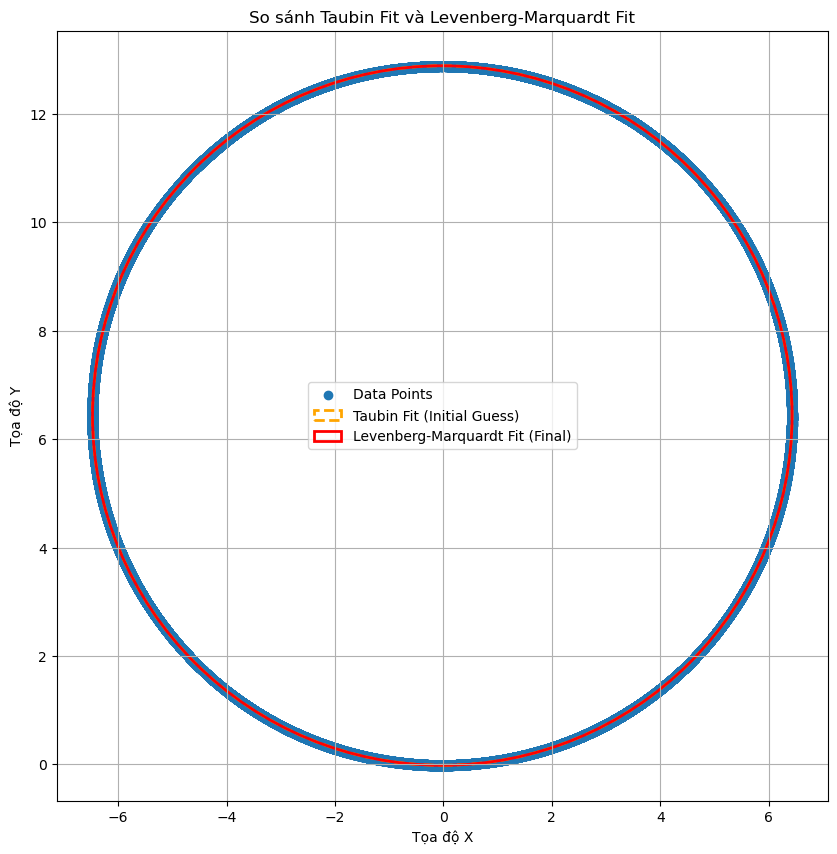

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# (Dán các hàm circle_fit_by_taubin và circle_residuals vào đây...)
# ...
def circle_fit_by_taubin(points):
    """Khớp hình tròn bằng thuật toán Taubin."""
    n = points.shape[0]
    if n < 3: return None, None, None, 0
    mean_x = np.mean(points[:, 0])
    mean_y = np.mean(points[:, 1])
    xi = points[:, 0] - mean_x
    yi = points[:, 1] - mean_y
    zi = xi**2 + yi**2
    m_xx = np.mean(xi**2); m_yy = np.mean(yi**2); m_xy = np.mean(xi * yi)
    m_xz = np.mean(xi * zi); m_yz = np.mean(yi * zi); m_zz = np.mean(zi**2)
    m_z = m_xx + m_yy; cov_xy = m_xx * m_yy - m_xy**2; var_z = m_zz - m_z**2
    a3 = 4 * m_z; a2 = -3 * m_z**2 - m_zz
    a1 = var_z * m_z + 4 * cov_xy * m_z - m_xz**2 - m_yz**2
    a0 = m_xz * (m_xz * m_yy - m_yz * m_xy) + m_yz * (m_yz * m_xx - m_xz * m_xy) - var_z * cov_xy
    a22 = a2 + a2; a33 = a3 + a3 + a3
    x = 0.0; y = a0; i = 0
    for i in range(99):
        dy = a1 + x * (a22 + a33 * x)
        if dy == 0: break
        x_new = x - y / dy
        if x_new == x or not np.isfinite(x_new): break
        y_new = a0 + x_new * (a1 + x_new * (a2 + x_new * a3))
        if abs(y_new) >= abs(y): break
        x = x_new; y = y_new
    iterations = i + 1
    det = x**2 - x * m_z + cov_xy
    if det == 0: return None, None, None, iterations
    x_center = (m_xz * (m_yy - x) - m_yz * m_xy) / (2 * det)
    y_center = (m_yz * (m_xx - x) - m_xz * m_xy) / (2 * det)
    a = x_center + mean_x; b = y_center + mean_y
    r = np.sqrt(x_center**2 + y_center**2 + m_z)
    return a, b, r, iterations

def circle_residuals(params, x_data, y_data):
    """Hàm tính vector phần dư hình học."""
    a, b, R = params
    return np.sqrt((x_data - a)**2 + (y_data - b)**2) - R

def circle_fit_by_lm(points, initial_guess):
    """Khớp hình tròn bằng Levenberg-Marquardt."""
    x_data = points[:, 0]
    y_data = points[:, 1]
    res = least_squares(circle_residuals, initial_guess, args=(x_data, y_data), method='lm')
    a_fit, b_fit, r_fit = res.x
    return a_fit, b_fit, r_fit

# ==============================================================================
# HÀM MỚI: TÍNH TOÁN CÁC CHỈ SỐ SAI SỐ
# ==============================================================================
def calculate_errors(points, circle_params):
    """
    Tính toán các chỉ số sai số cho kết quả khớp hình tròn.

    Args:
        points (np.array): Mảng điểm dữ liệu (N, 2).
        circle_params (tuple): Tham số của hình tròn đã khớp (a, b, R).

    Returns:
        dict: Một từ điển chứa các chỉ số sai số.
    """
    a, b, R = circle_params
    x_data = points[:, 0]
    y_data = points[:, 1]
    
    # 1. Tính toán vector phần dư (residuals)
    residuals = circle_residuals(circle_params, x_data, y_data)
    
    # 2. Tính MSE
    mse = np.mean(residuals**2)
    
    # 3. Tính RMSE (sigma)
    rmse = np.sqrt(mse)
    
    # 4. Tính MAE
    mae = np.mean(np.abs(residuals))
    
    # 5. (Tùy chọn) Tìm sai số lớn nhất để biết mức độ ảnh hưởng của outlier
    max_error = np.max(np.abs(residuals))
    
    error_metrics = {
        'residuals': residuals,
        'MSE': mse,
        'RMSE (sigma)': rmse,
        'MAE': mae,
        'Max Error': max_error,
        'Num Points': len(points)
    }
    
    return error_metrics


# ==============================================================================
# CẬP NHẬT QUY TRÌNH CHÍNH
# ==============================================================================
if __name__ == '__main__':
    # --- 1. Tạo dữ liệu mẫu ---

    data_points = np.c_[x_points, y_points]

    # --- 2. Chạy Taubin để có điểm khởi đầu ---
    print("--- Bước 1: Tìm điểm khởi đầu bằng Taubin Fit ---")
    a_taubin, b_taubin, r_taubin, _ = circle_fit_by_taubin(data_points)
    
    if a_taubin is not None:
        initial_guess = (a_taubin, b_taubin, r_taubin)
        print(f"Kết quả Taubin (Initial Guess): a={a_taubin:.4f}, b={b_taubin:.4f}, r={r_taubin:.4f}")

        # --- 3. Chạy Levenberg-Marquardt ---
        print("\n--- Bước 2: Tinh chỉnh bằng Levenberg-Marquardt Fit ---")
        a_lm, b_lm, r_lm = circle_fit_by_lm(data_points, initial_guess)
        final_params = (a_lm, b_lm, r_lm)
        print(f"Kết quả cuối cùng (LM): a={a_lm:.4f}, b={b_lm:.4f}, r={r_lm:.4f}")

        # --- 4. TÍNH TOÁN VÀ IN RA SAI SỐ ---
        print("\n--- Bước 3: Đánh giá sai số của kết quả cuối cùng ---")
        errors = calculate_errors(data_points, final_params)
        
        # In các chỉ số chính
        print(f"Số điểm dữ liệu: {errors['Num Points']}")
        print(f"Sai số bình phương trung bình gốc (RMSE): {errors['RMSE (sigma)']:.6f}")
        print(f"Sai số tuyệt đối trung bình (MAE): {errors['MAE']:.6f}")
        print(f"Sai số lớn nhất (gây ra bởi outlier): {errors['Max Error']:.4f}")
        
        # (Tùy chọn) In ra 5 phần dư đầu tiên
        # print("\n5 phần dư đầu tiên:")
        # print(errors['residuals'][:5])

        # --- 5. Vẽ đồ thị ---
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.scatter(data_points[:, 0], data_points[:, 1], label='Data Points')
        circle_taubin = plt.Circle((a_taubin, b_taubin), r_taubin, color='orange', fill=False, linestyle='--', linewidth=2, label='Taubin Fit (Initial Guess)')
        ax.add_artist(circle_taubin)
        circle_lm = plt.Circle(final_params[:2], final_params[2], color='red', fill=False, linewidth=2, label='Levenberg-Marquardt Fit (Final)')
        ax.add_artist(circle_lm)
        ax.set_title('So sánh Taubin Fit và Levenberg-Marquardt Fit')
        ax.set_xlabel('Tọa độ X'); ax.set_ylabel('Tọa độ Y')
        ax.legend(); ax.grid(True); ax.set_aspect('equal', adjustable='box')
        plt.show()

--- Bắt đầu quy trình phân tích thùng phi 3D ---
Đã đọc thành công 24922949 điểm từ file.
Phạm vi chiều cao của thùng phi: từ -2.23m đến 15.45m.

Bắt đầu xử lý 18 lớp cắt với độ dày 1m...
 - Lớp Z~1.55m: Đã xử lý. R = 6.4486m, RMSE = 0.0389
 - Lớp Z~2.27m: Đã xử lý. R = 6.4507m, RMSE = 0.0100
 - Lớp Z~3.26m: Đã xử lý. R = 6.4508m, RMSE = 0.0083
 - Lớp Z~4.26m: Đã xử lý. R = 6.4520m, RMSE = 0.0064
 - Lớp Z~5.26m: Đã xử lý. R = 6.4517m, RMSE = 0.0051
 - Lớp Z~6.26m: Đã xử lý. R = 6.4525m, RMSE = 0.0045
 - Lớp Z~7.26m: Đã xử lý. R = 6.4513m, RMSE = 0.0039
 - Lớp Z~8.25m: Đã xử lý. R = 6.4519m, RMSE = 0.0039
 - Lớp Z~9.25m: Đã xử lý. R = 6.4526m, RMSE = 0.0037
 - Lớp Z~10.26m: Đã xử lý. R = 6.4521m, RMSE = 0.0034
 - Lớp Z~11.27m: Đã xử lý. R = 6.4479m, RMSE = 0.0329
 - Lớp Z~12.07m: Đã xử lý. R = 6.0851m, RMSE = 0.2611
 - Lớp Z~13.31m: Đã xử lý. R = 5.9812m, RMSE = 0.3377
 - Lớp Z~13.83m: Đã xử lý. R = 3.4440m, RMSE = 1.6341
 - Lớp Z~15.08m: Đã xử lý. R = 0.9654m, RMSE = 0.0361

Đang tính 

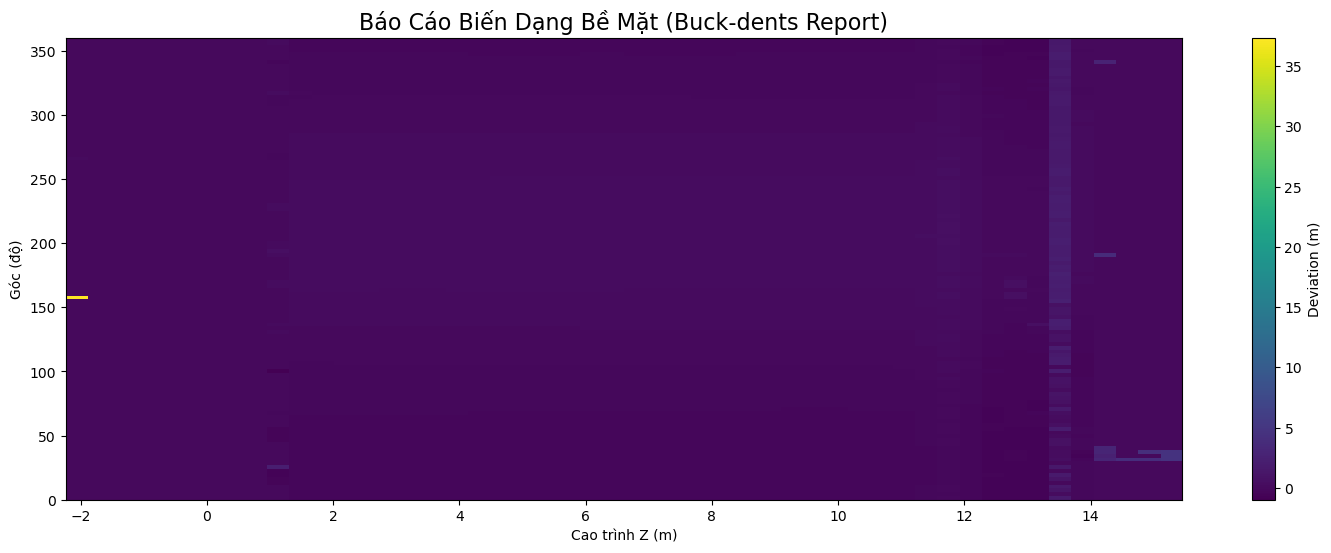

 -> Đã lưu báo cáo tại 'report_buck_dents.png'

2. Đang tạo báo cáo mặt cắt ngang tại Z ~ 7.4286m...


AttributeError: module 'matplotlib.colors' has no attribute 'LineCollection'

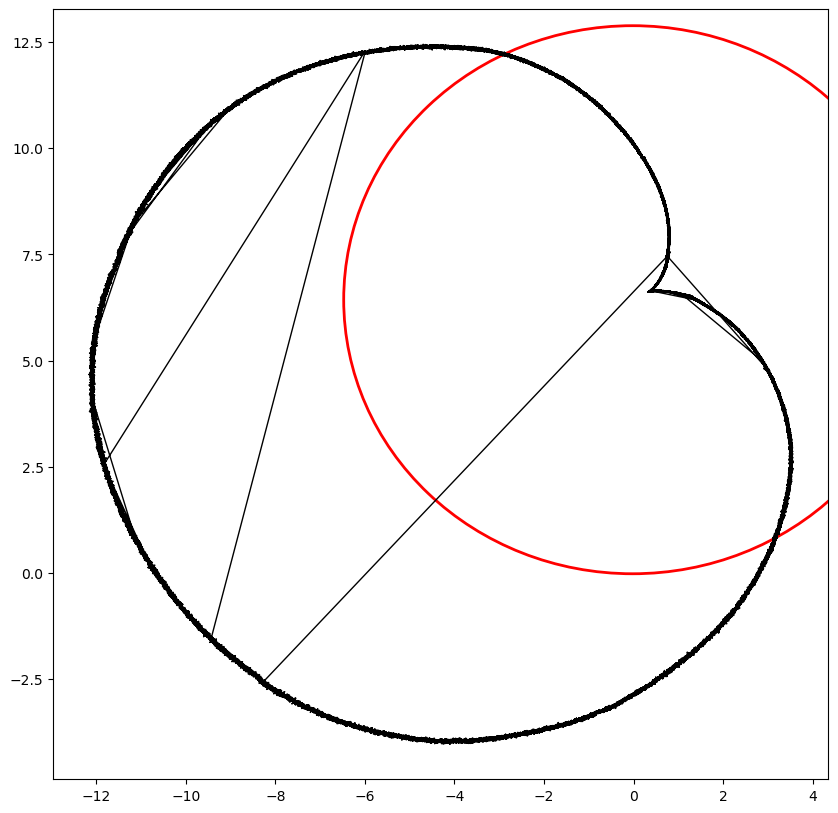

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import matplotlib.colors as mcolors

# ==============================================================================
# DÁN 5 HÀM ĐÃ VIẾT TRƯỚC ĐÓ VÀO ĐÂY
# 1. circle_fit_by_taubin(points)
# 2. circle_residuals(params, x_data, y_data)
# 3. circle_fit_by_lm(points, initial_guess)
# 4. calculate_errors(points, circle_params)
# 5. analyze_3d_tank(file_path, slice_thickness)
# ==============================================================================
# ... (dán code 5 hàm trên vào đây) ...
def circle_fit_by_taubin(points):
    """Khớp hình tròn bằng thuật toán Taubin."""
    n = points.shape[0]
    if n < 3: return None, None, None, 0
    mean_x = np.mean(points[:, 0])
    mean_y = np.mean(points[:, 1])
    xi = points[:, 0] - mean_x
    yi = points[:, 1] - mean_y
    zi = xi**2 + yi**2
    m_xx = np.mean(xi**2); m_yy = np.mean(yi**2); m_xy = np.mean(xi * yi)
    m_xz = np.mean(xi * zi); m_yz = np.mean(yi * zi); m_zz = np.mean(zi**2)
    m_z = m_xx + m_yy; cov_xy = m_xx * m_yy - m_xy**2; var_z = m_zz - m_z**2
    a3 = 4 * m_z; a2 = -3 * m_z**2 - m_zz
    a1 = var_z * m_z + 4 * cov_xy * m_z - m_xz**2 - m_yz**2
    a0 = m_xz * (m_xz * m_yy - m_yz * m_xy) + m_yz * (m_yz * m_xx - m_xz * m_xy) - var_z * cov_xy
    a22 = a2 + a2; a33 = a3 + a3 + a3
    x = 0.0; y = a0; i = 0
    for i in range(99):
        dy = a1 + x * (a22 + a33 * x)
        if dy == 0: break
        x_new = x - y / dy
        if x_new == x or not np.isfinite(x_new): break
        y_new = a0 + x_new * (a1 + x_new * (a2 + x_new * a3))
        if abs(y_new) >= abs(y): break
        x = x_new; y = y_new
    iterations = i + 1
    det = x**2 - x * m_z + cov_xy
    if det == 0: return None, None, None, iterations
    x_center = (m_xz * (m_yy - x) - m_yz * m_xy) / (2 * det)
    y_center = (m_yz * (m_xx - x) - m_xz * m_xy) / (2 * det)
    a = x_center + mean_x; b = y_center + mean_y
    r = np.sqrt(x_center**2 + y_center**2 + m_z)
    return a, b, r, iterations

def circle_residuals(params, x_data, y_data):
    """Hàm tính vector phần dư hình học."""
    a, b, R = params
    return np.sqrt((x_data - a)**2 + (y_data - b)**2) - R

def circle_fit_by_lm(points, initial_guess):
    """Khớp hình tròn bằng Levenberg-Marquardt."""
    x_data = points[:, 0]
    y_data = points[:, 1]
    res = least_squares(circle_residuals, initial_guess, args=(x_data, y_data), method='lm')
    a_fit, b_fit, r_fit = res.x
    return a_fit, b_fit, r_fit

def calculate_errors(points, circle_params):
    """Tính toán các chỉ số sai số cho kết quả khớp hình tròn."""
    a, b, R = circle_params
    residuals = circle_residuals(circle_params, points[:, 0], points[:, 1])
    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(residuals))
    max_error = np.max(np.abs(residuals))
    error_metrics = {
        'residuals': residuals, 'MSE': mse, 'RMSE (sigma)': rmse,
        'MAE': mae, 'Max Error': max_error, 'Num Points': len(points)
    }
    return error_metrics

def analyze_3d_tank(file_path, slice_thickness=100):
    """Thực hiện quy trình cắt lớp và phân tích toàn bộ thùng phi 3D."""
    # ... (code hàm như trước) ...
    print("--- Bắt đầu quy trình phân tích thùng phi 3D ---")
    try:
        df = pd.read_csv(file_path, header=None, names=['x', 'y', 'z'], sep=',')
        print(f"Đã đọc thành công {len(df)} điểm từ file.")
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file tại '{file_path}'")
        return None, None
    z_min, z_max = df['z'].min(), df['z'].max()
    print(f"Phạm vi chiều cao của thùng phi: từ {z_min:.2f}m đến {z_max:.2f}m.")
    slice_edges = np.arange(z_min, z_max, slice_thickness)
    all_results = []
    print(f"\nBắt đầu xử lý {len(slice_edges)} lớp cắt với độ dày {slice_thickness}m...")
    for i, z_start in enumerate(slice_edges):
        z_end = z_start + slice_thickness
        slice_df = df[(df['z'] >= z_start) & (df['z'] < z_end)]
        if len(slice_df) < 10: continue
        z_mean = slice_df['z'].mean()
        data_points_2d = slice_df[['x', 'y']].values
        a_t, b_t, r_t, _ = circle_fit_by_taubin(data_points_2d)
        if a_t is None:
            print(f" - Lớp Z~{z_mean:.2f}m: Taubin fit thất bại, bỏ qua.")
            continue
        initial_guess = (a_t, b_t, r_t)
        a_lm, b_lm, r_lm = circle_fit_by_lm(data_points_2d, initial_guess)
        final_params = (a_lm, b_lm, r_lm)
        errors = calculate_errors(data_points_2d, final_params)
        all_results.append({
            'z_mean': z_mean, 'center_x': a_lm, 'center_y': b_lm,
            'radius': r_lm, 'rmse': errors['RMSE (sigma)'], 'mae': errors['MAE']
        })
        print(f" - Lớp Z~{z_mean:.2f}m: Đã xử lý. R = {r_lm:.4f}m, RMSE = {errors['RMSE (sigma)']:.4f}")
    if not all_results:
        print("Không có lớp nào được xử lý thành công.")
        return None, None
    results_df = pd.DataFrame(all_results)
    return df, results_df

# ==============================================================================
# LỚP MỚI: TẠO BÁO CÁO THEO MẪU
# ==============================================================================
class TankReportGenerator:
    def __init__(self, original_pointcloud_df, analysis_results_df):
        """
        Khởi tạo với dữ liệu gốc và kết quả phân tích.
        
        Args:
            original_pointcloud_df (pd.DataFrame): DataFrame chứa X, Y, Z của toàn bộ điểm.
            analysis_results_df (pd.DataFrame): DataFrame chứa kết quả phân tích từng lớp.
        """
        self.df_points = original_pointcloud_df
        self.df_results = analysis_results_df
        self.precompute_deviations()

    def precompute_deviations(self):
        """
        Tính toán trước sai số (deviation) cho mọi điểm trong point cloud.
        Đây là bước quan trọng để tạo các báo cáo sau này.
        """
        print("\nĐang tính toán sai số (deviation) cho toàn bộ đám mây điểm...")
        # Lấy tâm trung bình làm tham chiếu cho toàn bộ bồn
        mean_center_x = self.df_results['center_x'].mean()
        mean_center_y = self.df_results['center_y'].mean()
        
        # Tính góc và deviation cho mỗi điểm
        dx = self.df_points['x'] - mean_center_x
        dy = self.df_points['y'] - mean_center_y
        
        # atan2 cho kết quả từ -pi đến pi. Chuyển về 0 đến 2*pi và sang độ.
        self.df_points['angle'] = (np.arctan2(dy, dx) + 2 * np.pi) % (2 * np.pi) * 180 / np.pi
        
        # Nội suy bán kính lý tưởng tại cao độ Z của mỗi điểm
        # Dùng kết quả phân tích theo lớp để có bán kính chính xác tại từng độ cao
        ideal_radius_at_z = np.interp(self.df_points['z'], self.df_results['z_mean'], self.df_results['radius'])
        
        actual_distance = np.sqrt(dx**2 + dy**2)
        self.df_points['deviation'] = actual_distance - ideal_radius_at_z
        print(" -> Hoàn tất tính toán sai số.")

    def generate_buck_dents_report(self, z_bins=50, angle_bins=120, filename='report_buck_dents.png'):
        """Tạo báo cáo Buck-dents (Bản đồ nhiệt trải phẳng)."""
        print(f"\n1. Đang tạo báo cáo Buck-dents...")
        z_min, z_max = self.df_points['z'].min(), self.df_points['z'].max()
        
        # Tạo lưới 2D (chiều cao vs. góc) và tính deviation trung bình cho mỗi ô
        heatmap_data, z_edges, angle_edges = np.histogram2d(
            self.df_points['z'], self.df_points['angle'],
            bins=[z_bins, angle_bins],
            weights=self.df_points['deviation']
        )
        
        counts, _, _ = np.histogram2d(
            self.df_points['z'], self.df_points['angle'],
            bins=[z_bins, angle_bins]
        )
        
        # Tránh chia cho 0 ở những ô không có điểm
        heatmap_data = np.divide(heatmap_data, counts, out=np.zeros_like(heatmap_data), where=counts!=0)
        
        # Vẽ bản đồ nhiệt
        fig, ax = plt.subplots(figsize=(18, 6))
        # dùng T để ma trận khớp với trục
        im = ax.imshow(heatmap_data.T, origin='lower', aspect='auto', 
                         extent=[z_min, z_max, 0, 360], cmap='viridis')
        
        ax.set_title('Báo Cáo Biến Dạng Bề Mặt (Buck-dents Report)', fontsize=16)
        ax.set_xlabel('Cao trình Z (m)')
        ax.set_ylabel('Góc (độ)')
        fig.colorbar(im, ax=ax, label='Deviation (m)')
        plt.savefig(filename)
        plt.show()
        print(f" -> Đã lưu báo cáo tại '{filename}'")

    def generate_cross_section_report(self, target_z, slice_thickness=0.1, magnification=20, filename='report_cross_section.png'):
        """Tạo báo cáo mặt cắt ngang tại một cao độ Z cụ thể."""
        print(f"\n2. Đang tạo báo cáo mặt cắt ngang tại Z ~ {target_z}m...")
        lower = target_z - slice_thickness / 2
        upper = target_z + slice_thickness / 2
        slice_df = self.df_points[(self.df_points['z'] >= lower) & (self.df_points['z'] <= upper)]
        
        if len(slice_df) < 10:
            print(" -> Không đủ điểm tại cao độ này.")
            return

        # Tìm thông số vòng tròn cho lớp này từ kết quả đã có
        result_row = self.df_results.iloc[(self.df_results['z_mean'] - target_z).abs().argmin()]
        a, b, r = result_row['center_x'], result_row['center_y'], result_row['radius']
        
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # Vẽ deviation plot được khuếch đại
        residuals = slice_df['deviation']
        plot_x = slice_df['x'] + residuals * np.cos(slice_df['angle'] * np.pi / 180) * magnification
        plot_y = slice_df['y'] + residuals * np.sin(slice_df['angle'] * np.pi / 180) * magnification
        ax.plot(plot_x, plot_y, color='black', linewidth=1, label=f'Deviation Plot (x{magnification})')
        
        # Vẽ hình tròn chuẩn
        circle = plt.Circle((a, b), r, color='red', fill=False, linewidth=2, label='Best-fit Radius')
        ax.add_artist(circle)
        
        # Tô màu cho deviation plot
        points = np.array([plot_x, plot_y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        norm = plt.Normalize(residuals.min(), residuals.max())
        lc = mcolors.LineCollection(segments, cmap='jet', norm=norm)
        lc.set_array(residuals)
        lc.set_linewidth(3)
        line = ax.add_collection(lc)
        fig.colorbar(line, ax=ax, label='Deviation (m)')

        ax.set_title(f'Báo Cáo Mặt Cắt Ngang tại Z ~ {target_z:.2f}m')
        ax.set_xlabel('Tọa độ X (m)')
        ax.set_ylabel('Tọa độ Y (m)')
        ax.set_aspect('equal', adjustable='box')
        ax.grid(True)
        plt.savefig(filename)
        plt.show()
        print(f" -> Đã lưu báo cáo tại '{filename}'")

    def generate_verticality_report(self, station_name="Station 5", filename='report_verticality.png'):
        """Tạo báo cáo mặt cắt dọc (độ thẳng đứng)."""
        print(f"\n3. Đang tạo báo cáo độ thẳng đứng...")
        fig, ax = plt.subplots(figsize=(8, 10))
        
        # Tính toán độ lệch của tâm so với trục trung bình
        mean_cx = self.df_results['center_x'].mean()
        center_deviation = self.df_results['center_x'] - mean_cx
        
        ax.plot(center_deviation, self.df_results['z_mean'])
        
        ax.set_title(f'Verticality Report - {station_name}')
        ax.set_xlabel('Độ lệch của tâm so với trục trung bình (m)')
        ax.set_ylabel('Cao trình Z (m)')
        ax.grid(True)
        ax.axvline(0, color='black', linestyle='--') # Vẽ trục trung tâm
        plt.savefig(filename)
        plt.show()
        print(f" -> Đã lưu báo cáo tại '{filename}'")

# ==============================================================================
# THỰC THI QUY TRÌNH HOÀN CHỈNH
# ==============================================================================
if __name__ == '__main__':
    # Đường dẫn file dữ liệu của bạn
    file_to_analyze = 'point_cloud_1.txt' # Thay bằng file thật của bạn
    
    # Bước 1: Phân tích dữ liệu 3D
    # Tạo dữ liệu mẫu nếu file không tồn tại
    try:
        pd.read_csv(file_to_analyze)
    except FileNotFoundError:
        print(f"Không tìm thấy file '{file_to_analyze}'. Đang tạo file dữ liệu mẫu...")
        R_ideal = 5.0; center_x, center_y = 10, 20
        z_coords = np.linspace(0, 10, 101)
        all_points_3d = []
        for z in z_coords:
            num_points_slice = 150
            angles = np.linspace(0, 2 * np.pi, num_points_slice)
            radius_at_z = R_ideal - 0.1 * np.cos(np.pi * z / 5)
            if 4.0 < z < 5.0: radius_at_z -= 0.2
            x = center_x + radius_at_z * np.cos(angles) + np.random.normal(0, 0.02, num_points_slice)
            y = center_y + radius_at_z * np.sin(angles) + np.random.normal(0, 0.02, num_points_slice)
            z_vals = np.full_like(x, z)
            for i in range(num_points_slice): all_points_3d.append([x[i], y[i], z_vals[i]])
        mock_data_3d = np.array(all_points_3d)
        np.savetxt(file_to_analyze, mock_data_3d, delimiter=",", fmt='%.4f')

    df_original, df_analysis = analyze_3d_tank(file_to_analyze, slice_thickness=1)

    # Bước 2: Tạo các báo cáo từ kết quả phân tích
    if df_original is not None and df_analysis is not None:
        report_generator = TankReportGenerator(df_original, df_analysis)
        
        # Tạo báo cáo 1: Buck-dents
        report_generator.generate_buck_dents_report()
        
        # Tạo báo cáo 2: Mặt cắt ngang (chọn một cao độ ở giữa để minh họa)
        middle_z = df_original['z'].median()
        report_generator.generate_cross_section_report(target_z=middle_z)
        
        # Tạo báo cáo 3: Độ thẳng đứng
        report_generator.generate_verticality_report(station_name="BUCKET E1")

In [181]:
0.001*100

0.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import csv # Thư viện để làm việc với file CSV

# ==============================================================================
# DÁN CÁC HÀM VÀ LỚP ĐÃ VIẾT TRƯỚC ĐÓ VÀO ĐÂY
# ... (toàn bộ code từ các câu trả lời trước, bao gồm các hàm fit, analyze và lớp TankReportGenerator)
# ...
def circle_fit_by_taubin(points):
    """Khớp hình tròn bằng thuật toán Taubin."""
    n = points.shape[0]
    if n < 3: return None, None, None, 0
    mean_x = np.mean(points[:, 0])
    mean_y = np.mean(points[:, 1])
    xi = points[:, 0] - mean_x
    yi = points[:, 1] - mean_y
    zi = xi**2 + yi**2
    m_xx = np.mean(xi**2); m_yy = np.mean(yi**2); m_xy = np.mean(xi * yi)
    m_xz = np.mean(xi * zi); m_yz = np.mean(yi * zi); m_zz = np.mean(zi**2)
    m_z = m_xx + m_yy; cov_xy = m_xx * m_yy - m_xy**2; var_z = m_zz - m_z**2
    a3 = 4 * m_z; a2 = -3 * m_z**2 - m_zz
    a1 = var_z * m_z + 4 * cov_xy * m_z - m_xz**2 - m_yz**2
    a0 = m_xz * (m_xz * m_yy - m_yz * m_xy) + m_yz * (m_yz * m_xx - m_xz * m_xy) - var_z * cov_xy
    a22 = a2 + a2; a33 = a3 + a3 + a3
    x = 0.0; y = a0; i = 0
    for i in range(99):
        dy = a1 + x * (a22 + a33 * x)
        if dy == 0: break
        x_new = x - y / dy
        if x_new == x or not np.isfinite(x_new): break
        y_new = a0 + x_new * (a1 + x_new * (a2 + x_new * a3))
        if abs(y_new) >= abs(y): break
        x = x_new; y = y_new
    iterations = i + 1
    det = x**2 - x * m_z + cov_xy
    if det == 0: return None, None, None, iterations
    x_center = (m_xz * (m_yy - x) - m_yz * m_xy) / (2 * det)
    y_center = (m_yz * (m_xx - x) - m_xz * m_xy) / (2 * det)
    a = x_center + mean_x; b = y_center + mean_y
    r = np.sqrt(x_center**2 + y_center**2 + m_z)
    return a, b, r, iterations

def circle_residuals(params, x_data, y_data):
    """Hàm tính vector phần dư hình học."""
    a, b, R = params
    return np.sqrt((x_data - a)**2 + (y_data - b)**2) - R

def circle_fit_by_lm(points, initial_guess):
    """Khớp hình tròn bằng Levenberg-Marquardt."""
    x_data = points[:, 0]
    y_data = points[:, 1]
    res = least_squares(circle_residuals, initial_guess, args=(x_data, y_data), method='lm')
    a_fit, b_fit, r_fit = res.x
    return a_fit, b_fit, r_fit

def calculate_errors(points, circle_params):
    """Tính toán các chỉ số sai số cho kết quả khớp hình tròn."""
    a, b, R = circle_params
    residuals = circle_residuals(circle_params, points[:, 0], points[:, 1])
    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(residuals))
    max_error = np.max(np.abs(residuals))
    error_metrics = {
        'residuals': residuals, 'MSE': mse, 'RMSE (sigma)': rmse,
        'MAE': mae, 'Max Error': max_error, 'Num Points': len(points)
    }
    return error_metrics

def analyze_3d_tank(file_path, slice_thickness=0.1):
    """Thực hiện quy trình cắt lớp và phân tích toàn bộ thùng phi 3D."""
    # ... (code hàm như trước) ...
    print("--- Bắt đầu quy trình phân tích thùng phi 3D ---")
    try:
        df = pd.read_csv(file_path, header=None, names=['x', 'y', 'z'], sep=',')
        print(f"Đã đọc thành công {len(df)} điểm từ file.")
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file tại '{file_path}'")
        return None, None
    z_min, z_max = df['z'].min(), df['z'].max()
    print(f"Phạm vi chiều cao của thùng phi: từ {z_min:.2f}m đến {z_max:.2f}m.")
    slice_edges = np.arange(z_min, z_max, slice_thickness)
    all_results = []
    print(f"\nBắt đầu xử lý {len(slice_edges)} lớp cắt với độ dày {slice_thickness}m...")
    for i, z_start in enumerate(slice_edges):
        z_end = z_start + slice_thickness
        slice_df = df[(df['z'] >= z_start) & (df['z'] < z_end)]
        if len(slice_df) < 10: continue
        z_mean = slice_df['z'].mean()
        data_points_2d = slice_df[['x', 'y']].values
        a_t, b_t, r_t, _ = circle_fit_by_taubin(data_points_2d)
        if a_t is None:
            print(f" - Lớp Z~{z_mean:.2f}m: Taubin fit thất bại, bỏ qua.")
            continue
        initial_guess = (a_t, b_t, r_t)
        a_lm, b_lm, r_lm = circle_fit_by_lm(data_points_2d, initial_guess)
        final_params = (a_lm, b_lm, r_lm)
        errors = calculate_errors(data_points_2d, final_params)
        all_results.append({
            'z_mean': z_mean, 'center_x': a_lm, 'center_y': b_lm,
            'radius': r_lm, 'rmse': errors['RMSE (sigma)'], 'mae': errors['MAE'],
            'slice_points': data_points_2d
        })
        print(f" - Lớp Z~{z_mean:.2f}m: Đã xử lý. R = {r_lm:.4f}m, RMSE = {errors['RMSE (sigma)']:.4f}")
    if not all_results:
        print("Không có lớp nào được xử lý thành công.")
        return None, None
    results_df = pd.DataFrame(all_results)
    return df, results_df

class TankReportGenerator:
    # ... (Dán các hàm __init__, precompute_deviations, và các hàm generate_* khác vào đây)
    def __init__(self, original_pointcloud_df, analysis_results_df):
        self.df_points = original_pointcloud_df
        self.df_results = analysis_results_df
        self.precompute_deviations()
        
    def precompute_deviations(self):
      """Tính toán sai số cho toàn bộ point cloud."""
      # ... (code như cũ)
      pass
      
    def generate_buck_dents_report(self, z_bins=50, angle_bins=120, filename='report_buck_dents.png'):
      """Tạo báo cáo Buck-dents."""
      # ... (code như cũ)
      pass
      
    # ... (các hàm generate khác)
    #==========================================================================
    # HÀM MỚI ĐỂ XUẤT FILE CSV
    #==========================================================================
    def generate_csv_report(self, 
                              filename='report_ovality_circumference.csv',
                              jacket_name='Jacket-01',
                              nominal_radius=None,
                              oor_tolerance=0.007,
                              circum_tolerance=0.020):
        """
        Tạo báo cáo dạng CSV theo mẫu của Ørsted.

        Args:
            filename (str): Tên file CSV đầu ra.
            jacket_name (str): Tên của cấu kiện.
            nominal_radius (float): Bán kính danh nghĩa (từ bản vẽ) để tính độ lệch chu vi.
            oor_tolerance (float): Ngưỡng dung sai cho phép đối với độ vênh (OOR).
            circum_tolerance (float): Ngưỡng dung sai cho phép đối với độ lệch chu vi.
        """
        print(f"\n4. Đang tạo báo cáo CSV '{filename}'...")

        # --- Bước 1: Chuẩn bị các giá trị tính toán ---
        
        # Nếu không có bán kính danh nghĩa, dùng bán kính trung bình
        if nominal_radius is None:
            print("Cảnh báo: Không có bán kính danh nghĩa. Sử dụng bán kính trung bình làm tham chiếu.")
            nominal_radius = self.df_results['radius'].mean()
        
        nominal_circumference = 2 * np.pi * nominal_radius
        
        # Tạo một DataFrame mới để chứa kết quả cho báo cáo
        report_data = []
        for index, row in self.df_results.iterrows():
            z = row['z_mean']
            a, b, r = row['center_x'], row['center_y'], row['radius']
            points = row['slice_points']
            
            # Tính Dmax, Dmin một cách bền vững
            residuals = circle_residuals((a, b, r), points[:, 0], points[:, 1])
            d_min = 2 * (r + np.percentile(residuals, 1)) # Bỏ 1% giá trị nhỏ nhất
            d_max = 2 * (r + np.percentile(residuals, 99)) # Bỏ 1% giá trị lớn nhất
            
            # Tính toán các giá trị cho báo cáo
            oor = d_max - d_min
            circumference = 2 * np.pi * r
            circum_deviation = circumference - nominal_circumference
            
            # Kiểm tra Accepted/Rejected
            is_oor_ok = "Accepted" if oor <= oor_tolerance else "Rejected"
            is_circum_ok = "Accepted" if abs(circum_deviation) <= circum_tolerance else "Rejected"
            final_status = "Accepted" if (is_oor_ok == "Accepted" and is_circum_ok == "Accepted") else "Rejected"
            
            report_data.append({
                'Survey pos.': f"+{z*1000:.0f} mm", # Chuyển m sang mm
                'Dmax': f"{d_max:.5f}",
                'Dmin': f"{d_min:.5f}",
                'Deviation (OOR)': f"{oor:.5f}",
                'Circumference': f"{circumference:.5f}",
                'Deviation (Circumference)': f"{circum_deviation:.5f}",
                'Accepted / Rejected': final_status
            })
            
        df_report = pd.DataFrame(report_data)

        # --- Bước 2: Ghi file CSV theo đúng định dạng ---
        with open(filename, 'w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            
            # Ghi các dòng header
            writer.writerow(['Ørsted Wind Power A/S'])
            writer.writerow(['Contractor', '', 'Project'])
            writer.writerow(['', '', '', 'Revision:'])
            writer.writerow(['', '', '', 'Date:'])
            writer.writerow(['', '', '', 'Page 1 of 1'])
            writer.writerow(['Bucket Ovality & Circumference'])
            writer.writerow(['Jacket Name', jacket_name, 'Temperature', '', 'Calibration date'])
            writer.writerow(['Date', '', 'Measurement equipment', '', 'Inspected by'])
            writer.writerow(['Time', '', 'Serial no.', '', 'Measurement procedure rev no.'])
            writer.writerow(['Remarks'])
            writer.writerow(['"Jacket to be surveyed according to requirements in OTS-F1150.'])
            writer.writerow(['Survey must document the ovality and circumfernce of the buckets"'])
            # Ghi các dòng trống
            for _ in range(15):
                writer.writerow([])
            
            # Ghi phần kết quả
            writer.writerow(['Survey results'])
            writer.writerow(df_report.columns.tolist()) # Ghi header của bảng
            writer.writerows(df_report.values.tolist()) # Ghi dữ liệu

        print(f" -> Đã lưu báo cáo thành công tại '{filename}'")
        return df_report

# ==============================================================================
# THỰC THI QUY TRÌNH HOÀN CHỈNH
# ==============================================================================
if __name__ == '__main__':
    # Đường dẫn file dữ liệu của bạn
    file_to_analyze = 'tank_3d_data.csv' 
    
    # Tạo dữ liệu mẫu nếu cần
    try: pd.read_csv(file_to_analyze)
    except FileNotFoundError:
        # ... (code tạo dữ liệu mẫu như cũ)
        pass

    # Bước 1: Phân tích dữ liệu 3D
    df_original, df_analysis = analyze_3d_tank(file_to_analyze, slice_thickness=0.1)

    # Bước 2: Tạo các báo cáo
    if df_original is not None and df_analysis is not None:
        report_generator = TankReportGenerator(df_original, df_analysis)
        
        # ... (gọi các hàm generate báo cáo hình ảnh nếu muốn)

        # Tạo báo cáo CSV
        # CUNG CẤP BÁN KÍNH DANH NGHĨA (THEO THIẾT KẾ) Ở ĐÂY (tính bằng mét)
        NOMINAL_RADIUS_FROM_DESIGN = 5.0 
        
        csv_report_df = report_generator.generate_csv_report(
            filename='Bucket_E1_Ovality_Report.csv',
            jacket_name='BUCKET E1',
            nominal_radius=NOMINAL_RADIUS_FROM_DESIGN,
            oor_tolerance=0.015,  # Dung sai OOR là 15mm
            circum_tolerance=0.025 # Dung sai chu vi là 25mm
        )
        
        print("\n--- Xem trước báo cáo CSV ---")
        print(csv_report_df.to_string())